# <h1 align="center">COSC2753 - Machine Learning</h1>

<h2 align="center">Group Machine Learning Project</h2>

---

### 👥 Group Members:
- Ngo Van Tai (S3974892)  
- Huynh Thai Duong (S)
- Huynh Tan Phat (S)
- Duong Minh Tri (S)

---


# CONVENTIONAL RULE

- Tất cả tên biến đều là snake case (variable_one)
- Tất cả function đều phải có docstring (có thể nhờ GPT rồi parapharse lại)
- Tất cả import library thì phải được đặt ở đầu file với comment rõ ràng vào cái phần của nó (ở chỗ import neccessary librariess)
- Hàm nào lặp lại quá nhiều lần thì phải define helper function (cùng với docstring) of course

# TABLE OF CONTENT

# IMPORT NECESSARY LIBRARIES

In [3]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import math

import joblib
import os

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Model preprocessing and evaluation
from scipy.stats.mstats import winsorize
from sklearn.impute import SimpleImputer

from sklearn.model_selection import (
    train_test_split,
    KFold,
    GridSearchCV,
)
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
)

## 1) Define Some Helper Functions

In [4]:
def print_header(content, padding=10, width=None, tabs=False):
    """
    Prints a header wrapped inside a box.

    Parameters:
    - content: Text to display as header (automatically uppercase)
    - padding: Spaces on each side of the content inside the box
    - width: Optional fixed width for the entire box. If None, adjusts to content size.
    - tabs: If true, adds the spacing `\t`to center of the box
    """
    content = content.upper()
    inner_width = len(content) + (padding * 2)
    box_width = width if width and width > inner_width else inner_width

    top_bottom = "+" + "-" * (box_width + 2) + "+"
    padded_content = "| " + content.center(box_width) + " |"
    prefix = "\t" * 3 if tabs else ""

    print(f"{prefix}{top_bottom}")
    print(f"{prefix}{padded_content}")
    print(f"{prefix}{top_bottom}")

# II. LOAD DATASET

## 1. Loading Dataset

In [5]:
df = pd.read_csv('./inputs/meta_train.csv')

# III. EXPLORATORY DATA ANALYSIS (EDA)

## 1) Dataset Overview

We can see that there are 4 columns inside the dataset:

| Column Name | Description |
|-------------|-------------|
| `image_id`  | Unique identifier for each image, matching the file names (.jpg) in the `train_images` directory |
| `label`     | The category of paddy disease. There are ten classes, including one for healthy (normal) plant |
| `variety`   | The paddy variety name |
| `age`       | The age of the paddy in days |

In [6]:
print_header('Dataset Overview')
df

+--------------------------------------+
|           DATASET OVERVIEW           |
+--------------------------------------+


image_id                  label variety  age
0      100330.jpg  bacterial_leaf_blight   ADT45   45
1      100365.jpg  bacterial_leaf_blight   ADT45   45
2      100382.jpg  bacterial_leaf_blight   ADT45   45
3      100632.jpg  bacterial_leaf_blight   ADT45   45
4      101918.jpg  bacterial_leaf_blight   ADT45   45
...           ...                    ...     ...  ...
10402  107607.jpg                 tungro   Zonal   55
10403  107811.jpg                 tungro   Zonal   55
10404  108547.jpg                 tungro   Zonal   55
10405  110245.jpg                 tungro   Zonal   55
10406  110381.jpg                 tungro   Zonal   55

[10407 rows x 4 columns]

## 2) Data Shape

In [7]:
print_header("Data Shape")

print("Number of Rows: ", df.shape[0])
print("Number of Columns: ", df.shape[1])

+--------------------------------+
|           DATA SHAPE           |
+--------------------------------+
Number of Rows:  10407
Number of Columns:  4


## 3) Explore Columns

### 3.1) Labels Column

There are 10 classes in the `label` column, including nine disease classes and one for healthy (normal) plant:

| Class                     | Explanation |
|--------------------------|-------------|
| `bacterial_leaf_blight`  | The bacterial disease results in dark lesions with yellow borders that cause leaf tissue death |
| `bacterial_leaf_streak`  | The bacterial infection results in leaf tissue death through the formation of streaks or lesions |
| `bacterial_panicle_blight` | The bacterial disease targets rice panicle structures by killing flower clusters which leads to decreased grain yields |
| `blast`                  | Blast is a fungal disease that causes dark lesions on leaves, necks, and panicles of rice, and can lead to plant death |
| `brown_spot`             | The disease produces brown circular lesions with yellowish margins on rice leaves which decrease photosynthesis and growth |
| `dead_heart`             | Stem borer infestation leads to this condition when the insect pests damage the plant's growing point which results in stunted growth or plant death |
| `downy_mildew`           | A fungal disease that causes yellowing of leaves with white fungal growth on the undersides, often reducing plant vigor |
| `hispa`                  | The hispa beetle infestation results in damage to rice plants through leaf consumption which leads to yield reduction |
| `normal`                 | This refers to healthy plants without any visible signs of disease or pest damage |
| `tungro`                 | A viral disease transmitted by leafhoppers that causes yellowing and stunting of rice plants, leading to yield loss |


In [8]:
unique_labels = df["label"].nunique()

print_header("Paddy Labels Overview")
print(f"The dataset contains {unique_labels} unique paddy labels.\n")

# Display the list of unique labels
print_header("List of Paddy Labels")
print("Here are the unique paddy varieties in the dataset:")
for idx, label in enumerate(df["label"].unique().tolist(), start=1):
    print(f"{idx}) {label}")

+-------------------------------------------+
|           PADDY LABELS OVERVIEW           |
+-------------------------------------------+
The dataset contains 10 unique paddy labels.

+------------------------------------------+
|           LIST OF PADDY LABELS           |
+------------------------------------------+
Here are the unique paddy varieties in the dataset:
1) bacterial_leaf_blight
2) bacterial_leaf_streak
3) bacterial_panicle_blight
4) blast
5) brown_spot
6) dead_heart
7) downy_mildew
8) hispa
9) normal
10) tungro


### 3.2) Variety Column

| Variety        | Explanation |
|----------------|-------------|
| `ADT45`        | ADT45 is a popular high yielding variety of rice from Tamil Nadu, which is known for its excellent grain quality and good resistance to pests and diseases |
| `IR20`         | IR20 is a widely grown rice type developed by the International Rice Research Institute, known for its resistance to drought and its good yield |
| `KarnatakaPonni` | KarnatakaPonni is a traditional rice variety grown in the southern region of India, particularly known for its taste and aroma |
| `Onthanel`     | Onthanel is a variety known for its good cooking qualities and higher resistance to pests, widely cultivated in some parts of India |
| `Ponni`        | Ponni is one of the most famous rice varieties in India, renowned for its smooth texture and aroma, widely used in South Indian cuisine |
| `Surya`        | Surya is a high-yielding variety known for its long grain and excellent cooking quality, commonly grown in Indian rice fields |
| `Zonal`        | Zonal is a rice variety developed for specific climatic zones, offering adaptability to different growing conditions |
| `AndraPonni`   | AndraPonni is a popular variety of rice from Andhra Pradesh, known for its fine texture and aroma |
| `AtchayaPonni` | AtchayaPonni is another aromatic and high-yielding variety, often used in South Indian cooking due to its distinct fragrance and taste |
| `RR`           | RR is a high-yielding variety of rice developed for various agro-climatic conditions, known for its disease resistance and good grain quality |


In [9]:
unique_variety = df["variety"].nunique()

print_header("Paddy Variety Overview")
print(f"The dataset contains {unique_variety} unique paddy varieties.\n")

# Display the list of unique variety
print_header("List of Paddy Varieties")
print("Here are the unique paddy varieties in the dataset:")
for idx, variety in enumerate(df["variety"].unique().tolist(), start=1):
    print(f"{idx}) {variety}")

+--------------------------------------------+
|           PADDY VARIETY OVERVIEW           |
+--------------------------------------------+
The dataset contains 10 unique paddy varieties.

+---------------------------------------------+
|           LIST OF PADDY VARIETIES           |
+---------------------------------------------+
Here are the unique paddy varieties in the dataset:
1) ADT45
2) IR20
3) KarnatakaPonni
4) Onthanel
5) Ponni
6) Surya
7) Zonal
8) AndraPonni
9) AtchayaPonni
10) RR


### 3.3) Age Columns

<ul>
    <li><strong>Mean:</strong> 64.04
        <p>The average age of 64.04 days suggests that, on average, the paddy plants in this dataset are relatively young. This could indicate that the plants are in an early to mid-growth stage</p>
    </li>
    <li><strong>Standard Deviation (std):</strong> 8.96
        <p>The standard deviation of 8.96 indicates a moderate level of variability in the paddy age. While most plants are similar in age, the spread indicates some variation, likely due to factors like planting times or environmental conditions</p>
    </li>
    <li><strong>Minimum Age:</strong> 45
        <p>The youngest paddy plant in the dataset is 45 days old. This could suggest that several plants are growing faster due to early planting or good conditions</p>
    </li>
    <li><strong>Maximum Age:</strong> 82
        <p>The oldest paddy plant in the dataset is 82 days old. This shows that some plants mature later, possibly due to delayed planting or growth issues</p>
    </li>
</ul>

In [10]:
unique_age = df["age"].nunique()

print_header("Paddy Ages Overview")
print(f"The dataset contains {unique_age} unique paddy ages.\n")

# Display the list of unique ages
print_header("List of Paddy Ages")
print("Here are the unique paddy ages in the dataset:")
df['age'].describe()

+-----------------------------------------+
|           PADDY AGES OVERVIEW           |
+-----------------------------------------+
The dataset contains 18 unique paddy ages.

+----------------------------------------+
|           LIST OF PADDY AGES           |
+----------------------------------------+
Here are the unique paddy ages in the dataset:


count    10407.000000
mean        64.043624
std          8.958830
min         45.000000
25%         60.000000
50%         67.000000
75%         70.000000
max         82.000000
Name: age, dtype: float64

## 4) Image Visualization 

Khúc này thì list ra 10 loại labels của paddy bằng hình ảnh. Mỗi label plot 5 hình là đẹp. tạo một function

sửa lại cái tên lable rõ ràng hơn tí

giống cái bài này:  https://www.kaggle.com/code/abdmental01/paddy-disease-clean-solution/notebook

In [11]:
import matplotlib.image as mpimg

def display_images(directory, num_images=5):
    # Fetch all image filenames in the given directory
    filenames = os.listdir(directory)
    
    # Limit the number of images to display based on the specified max_images
    num_images = min(num_images, len(filenames))
    
    # Set up the figure and axes to show the images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')
    
    # Loop through the selected images and show them
    for idx, filename in enumerate(filenames[:num_images]):
        # Construct the full path to the image file
        file_path = os.path.join(directory, filename)
        img = mpimg.imread(file_path)
        
        # Display the image on the respective axis
        axes[idx].imshow(img)
        axes[idx].axis('off')  # Hide the axis
        axes[idx].set_title(filename)  # Set the image filename as the title
    
    # Adjust layout for better display and show the images
    plt.tight_layout()
    plt.show()


+------------------------------------------------------------------+
|           VISUALIZING IMAGES FOR BACTERIAL_LEAF_BLIGHT           |
+------------------------------------------------------------------+


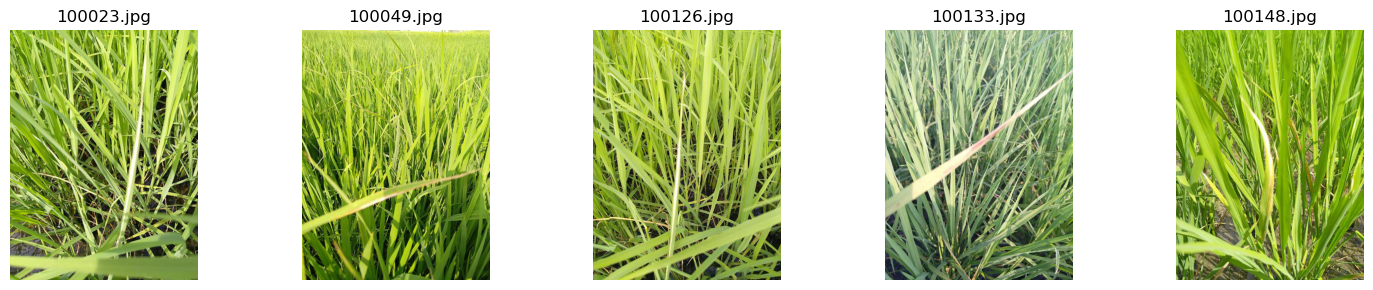

+------------------------------------------------------------------+
|           VISUALIZING IMAGES FOR BACTERIAL_LEAF_STREAK           |
+------------------------------------------------------------------+


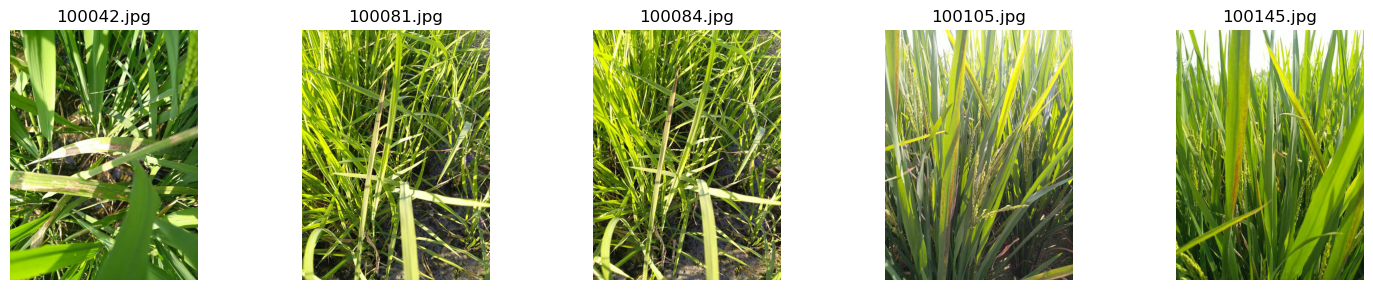

+---------------------------------------------------------------------+
|           VISUALIZING IMAGES FOR BACTERIAL_PANICLE_BLIGHT           |
+---------------------------------------------------------------------+


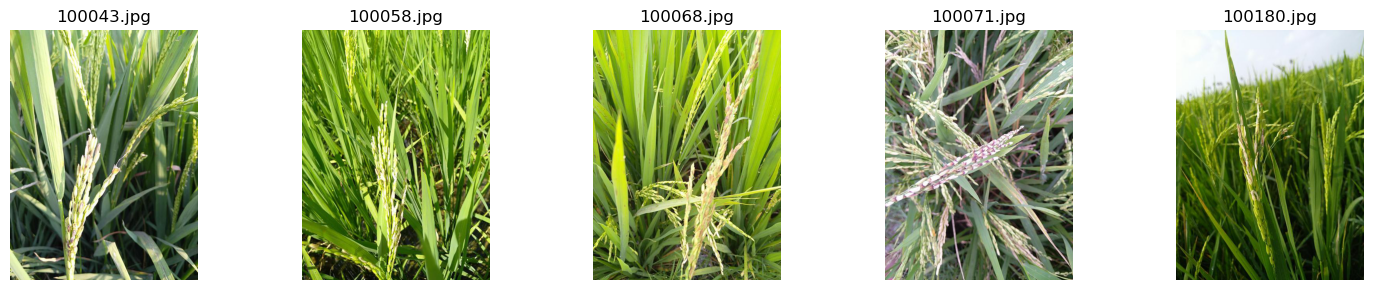

+--------------------------------------------------+
|           VISUALIZING IMAGES FOR BLAST           |
+--------------------------------------------------+


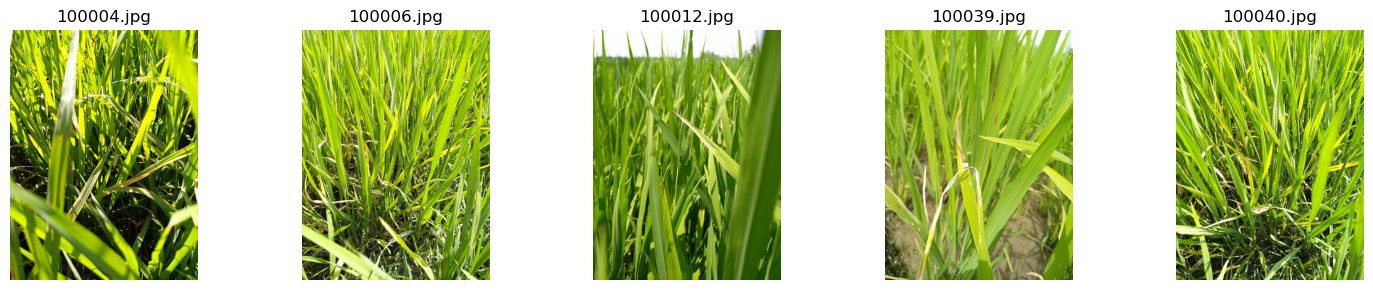

+-------------------------------------------------------+
|           VISUALIZING IMAGES FOR BROWN_SPOT           |
+-------------------------------------------------------+


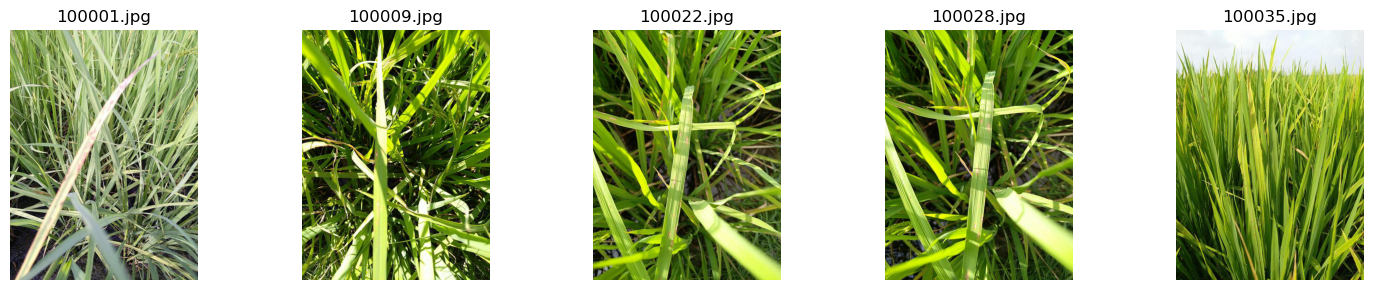

+-------------------------------------------------------+
|           VISUALIZING IMAGES FOR DEAD_HEART           |
+-------------------------------------------------------+


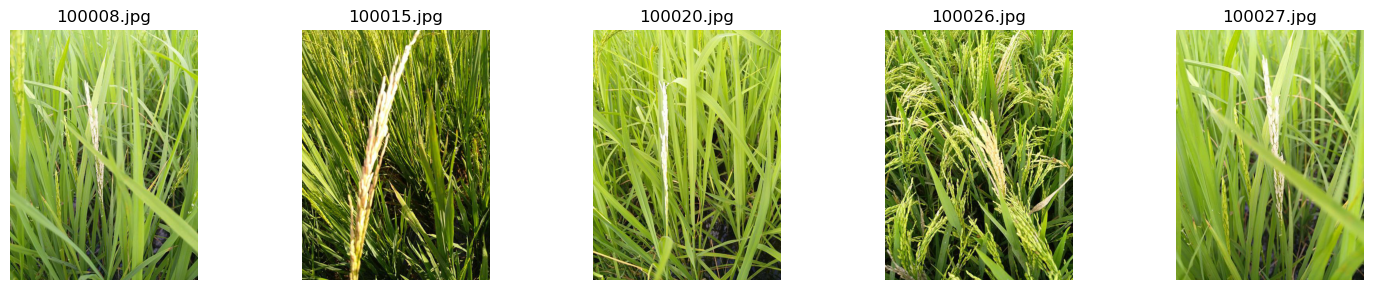

+---------------------------------------------------------+
|           VISUALIZING IMAGES FOR DOWNY_MILDEW           |
+---------------------------------------------------------+


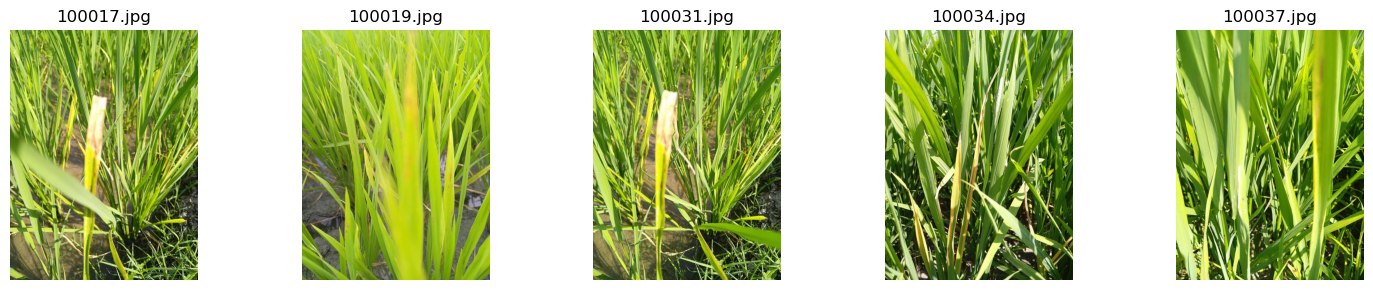

+--------------------------------------------------+
|           VISUALIZING IMAGES FOR HISPA           |
+--------------------------------------------------+


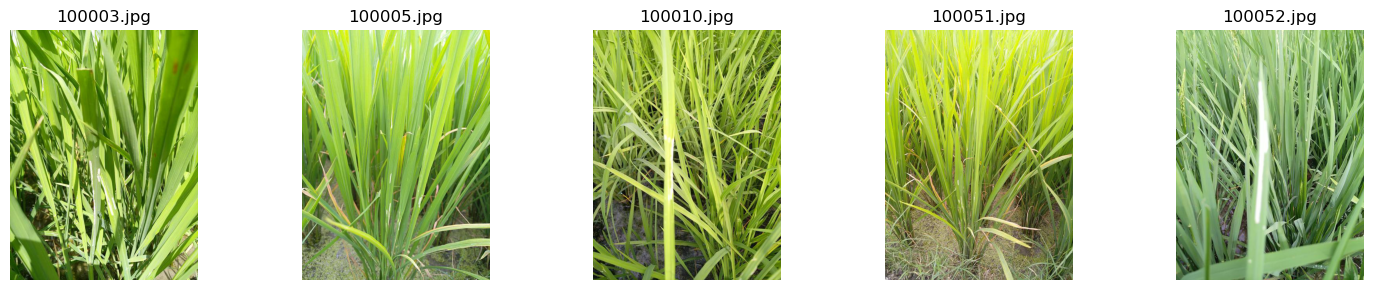

+---------------------------------------------------+
|           VISUALIZING IMAGES FOR NORMAL           |
+---------------------------------------------------+


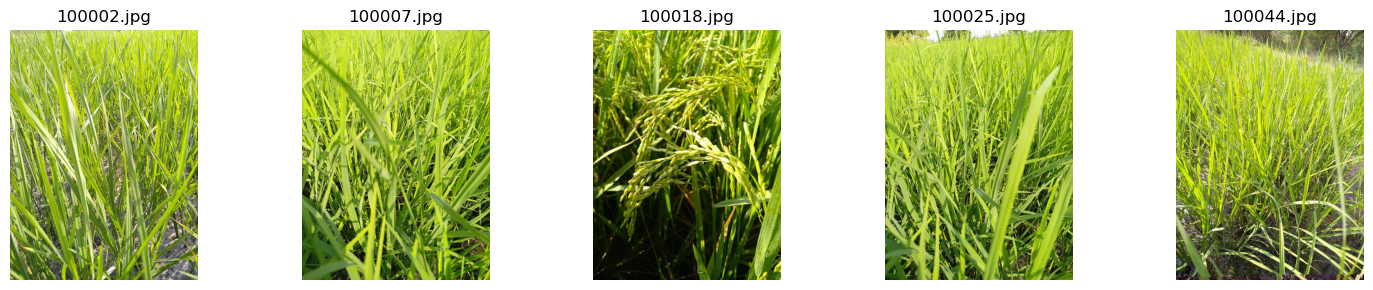

+---------------------------------------------------+
|           VISUALIZING IMAGES FOR TUNGRO           |
+---------------------------------------------------+


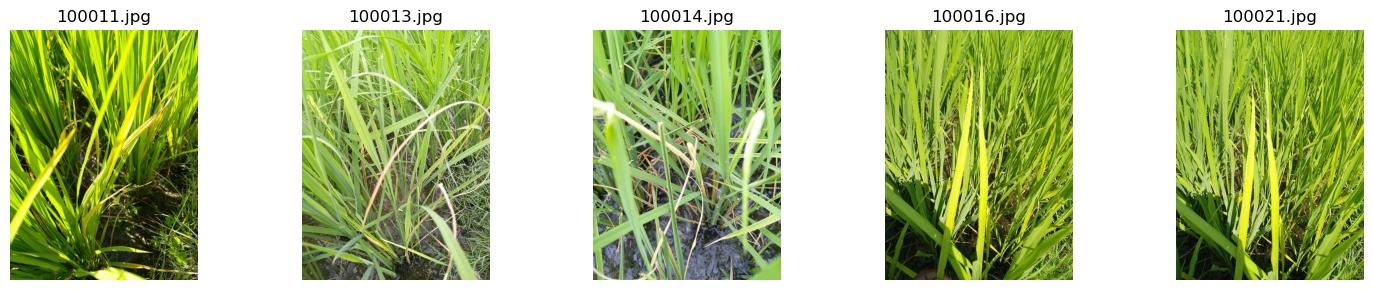

In [ ]:
# List of directories for each label
label_directories = [
    "bacterial_leaf_blight",
    "bacterial_leaf_streak",
    "bacterial_panicle_blight",
    "blast",
    "brown_spot",
    "dead_heart",
    "downy_mildew",
    "hispa",
    "normal",
    "tungro"
]

# Base path for the image directories
base_path = "./inputs/train_images"

# Loop through each label directory and display images
for label in label_directories:
    directory = os.path.join(base_path, label)
    print_header(f"Visualizing Images for {label}",tabs=True)
    display_images(directory, num_images=5)